###Β. Εισαγωγή του dataset
To dataset μας ονομάζεται **Nomao** και ανήκει στην κατηγορία των υπολογιστών. Είναι ουσιαστικά μια μηχανή αναζήτησης για τοποθεσίες και μαζεύοντας διάφορα δεδομένα(όνομα, διεύθυνση, ιστοσελίδα, τηλέφωνο κτλ) μιας συγκεκριμένες τοποθεσίας, αποφασίζει αν θα ενώσει αυτές τις τοποθεσίες αφού ανήκουν στην ίδια περιοχή.



In [ ]:
!pip install --upgrade pip
!pip install --upgrade scikit-learn
!pip install --upgrade pandas
!pip install --upgrade numpy
!pip install --upgrade scipy
!pip install --upgrade joblib
!pip install --upgrade imblearn

Requirement already up-to-date: pip in c:\users\papas\anaconda3\lib\site-packages (19.3.1)
Requirement already up-to-date: scikit-learn in c:\users\papas\anaconda3\lib\site-packages (0.22)
Requirement already up-to-date: pandas in c:\users\papas\anaconda3\lib\site-packages (0.25.3)
Requirement already up-to-date: numpy in c:\users\papas\anaconda3\lib\site-packages (1.17.4)
  Found existing installation: scipy 1.4.0
    Uninstalling scipy-1.4.0:
      Successfully uninstalled scipy-1.4.0
Requirement already up-to-date: joblib in c:\users\papas\anaconda3\lib\site-packages (0.14.1)
Requirement already up-to-date: imblearn in c:\users\papas\anaconda3\lib\site-packages (0.0)


In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv("Nomao.data", na_values=["?"], header=None) 

In [ ]:
np_data = df.values
data = np_data[:,0:-1]  # Ξεχωρίζουμε τα data από τις ετικέτες
dataTargets = np_data[:,-1]  # Οι ετικέτες
pd.set_option('display.max_rows', 1000)
print(df.head())
print(df.shape)
print(df.dtypes) 

   0    1     2         3         4         5         6   7   8    9    ...  \
0  0#1  1.0  1.00  1.000000  1.000000  1.000000  1.000000   s   s  NaN  ...   
1  0#2  1.0  0.75  0.857143  0.857143  0.894737  0.947368   s   n  NaN  ...   
2  0#3  1.0  1.00  1.000000  1.000000  1.000000  1.000000   s   s  NaN  ...   
3  4#5  1.0  0.75  0.857143  0.857143  0.842105  0.833333   s   n  1.0  ...   
4  6#7  0.0  0.00  0.250000  0.000000  0.250000  0.000000   n   n  NaN  ...   

        110       111  112       113       114       115 116  117       118  \
0  0.750000  0.500000    n  0.999953  0.777778  0.461538   n  1.0  1.000000   
1  0.500000  0.307692    n  0.999983  0.538462  0.437500   n  1.0  1.000000   
2  0.666667  0.461538    n  0.999993  0.800000  0.666667   n  1.0  1.000000   
3  0.500000  0.285714    n  0.998605  0.555556  0.384615   n  1.0  0.999994   
4       NaN       NaN    m       NaN       NaN       NaN   m  1.0       NaN   

   119  
0    1  
1    1  
2    1  
3    1  
4    

Ο αριθμός δειγμάτων είναι 34465, τα χαρακτηριστικά τους είναι 118 και το είδος τους είναι **object**, **float64** και **int64**. Πολλά από τα χαρακτηριστικά ενώ είναι κυρίως πχ float64 παίρνουν το είδος object γιατί μερικές τιμές δεν υπάρχουν και στη θέση τους μπαίνει "?". Η τελευταία στήλη είναι οι ετικέτες και η πρώτη στήλη είναι τα id. Δεν υπάρχουν μη διατεταγμένα χαρακτηριστικά.

Τυπώνοντας τις πρώτες 5 γραμμές του αρχείου, παρατηρούμε ότι δεν υπάρχουν ούτε επικεφαλίδες, ούτε αρίθμηση γραμμών. Η πρώτη στήλη είναι τα id. 

In [ ]:
print(df.values[0:5,:])

[['0#1' 1.0 1.0 1.0 1.0 1.0 1.0 's' 's' nan nan nan nan nan nan 'm' 'm'
  nan nan nan nan nan nan 'm' 'm' nan nan nan nan nan nan 'm' 'm' nan nan
  nan nan nan nan 'm' 'm' nan nan nan nan nan nan 'm' 'm' 1.0 1.0 1.0 1.0
  1.0 1.0 's' 's' 0.833333 0.714286 0.8461540000000001 0.8 0.804878
  0.731707 'n' 'n' 1.0 1.0 1.0 1.0 1.0 1.0 's' 's' 1.0 1.0 1.0 1.0 1.0
  1.0 's' 's' 1.0 1.0 1.0 1.0 1.0 1.0 's' 's' nan nan nan 'm' nan nan nan
  'm' 1.0 1.0 1.0 's' 1.0 1.0 1.0 's' 1.0 1.0 1.0 's' 0.9999670010889999
  0.75 0.5 'n' 0.999953002209 0.777777777778 0.46153846383100006 'n' 1.0
  0.999999996702 1]
 ['0#2' 1.0 0.75 0.857143 0.857143 0.8947370000000001 0.947368 's' 'n'
  nan nan nan nan nan nan 'm' 'm' nan nan nan nan nan nan 'm' 'm' nan nan
  nan nan nan nan 'm' 'm' nan nan nan nan nan nan 'm' 'm' nan nan nan nan
  nan nan 'm' 'm' 1.0 1.0 1.0 1.0 1.0 1.0 's' 's' 0.833333 0.714286
  0.8461540000000001 0.8 0.891892 0.810811 'n' 'n' 1.0 1.0 1.0 1.0 1.0
  1.0 's' 's' 1.0 1.0 1.0 1.0 1.0 1.0 's' '

Οι ετικέτες είναι "+1" και "-1", βρίσκονται στην τελευταία στήλη και υπάρχουν για να ξέρουμε κατά πόσο θα ενώσουμε συγκεκριμένες οντότητες μεταξύ τους, λόγω του ότι έχουν κοινά χαρακτηριστικά. Αν δεν έχουν τότε δε θα ενωθούν και η ετικέτα θα είναι "-1".

In [ ]:
# Υπολογίζουμε τον αριθμό δειγμάτων με απουσιάζουσες τιμές
#cat Nomao.data | grep "?" |  wc -l

34465


In [ ]:
print("Ποσοστό δειγμάτων(γραμμών) με απουσιάζουσες τιμές:", 34465/len(data)*100 , "%")

Ποσοστό δειγμάτων(γραμμών) με απουσιάζουσες τιμές: 100.0 %


In [ ]:
# Διαγράφουμε την πρώτη στήλη που είναι τα id
data = data[:,1:]
print(data.shape)

(34465, 118)


In [ ]:
frequencies = pd.value_counts(dataTargets)  # Μετράμε την συχνότητα εμφάνισης των δειγμάτων της κάθε κλάσης 
print("Συχνότητα εμφάνισης των δειγμάτων της κάθε κλάσης:")
print(frequencies)
for i in frequencies:
  print("Ποσοστό: ", i/len(dataTargets)*100, '%')  

Συχνότητα εμφάνισης των δειγμάτων της κάθε κλάσης:
 1    24621
-1     9844
dtype: int64
Ποσοστό:  71.43769041056144 %
Ποσοστό:  28.562309589438563 %



<font size="2">Παρατηρούμε ότι έχουμε δύο κλάσεις την **'1'** και την **'-1'**. Τα ποσοστά φαίνονται πιο πάνω και το dataset δεν είναι ισορροπημένο.</font>





Για να χειριστούμε τις απουσιάζουσες τιμές, μελετήσαμε το αρχείο **Nomao.names** που περιέχει πληροφορίες σχετικά με το είδος (text ή number) του dataset, πήραμε τις στήλες που είναι text και τις διαχωρίσαμε από αυτές που είναι numbers, φτιάχνοντας 2 πίνακες ξεχωριστούς, για να τρέξουμε στους μεν αριθμούς έναν **imputer mean** και στα text **imputer most_frequent**.

In [ ]:
# df = pd.read_csv("Nomao.data", na_values=["?"], header=None) 
# np_data = df.values
# data = np_data[:,0:-1]  # Ξεχωρίζουμε τα data από τις ετικέτες
# dataTargets = np_data[:,-1]  # Οι ετικέτες
# # Διαγράφουμε την πρώτη στήλη που είναι τα id
# data = data[:,1:]

In [ ]:
from sklearn.model_selection import train_test_split
import sys

np.set_printoptions(threshold=sys.maxsize)

labels_df = df.iloc[:, [-1]]
mapping = {1: 0, -1: 1}
labels_df = labels_df.replace(mapping)
# μετατρέπουμε το dataframe σε μονοδιάστατο array
data_labels = labels_df.values.flatten()

#χωρίζουμε τα δεδομένα σε train σε test
train, test, train_labels, test_labels = train_test_split(data, data_labels, test_size=0.30) 

In [ ]:
from sklearn.impute import SimpleImputer

nominal_indexes = [6,7,14,15,22,23,30,31,38,39,46,47,54,55,62,63,70,71,78,79,86,87,91,95,99,103,107,111,115]

train_numbers = train.copy()
train_strings = train.copy()
test_numbers = test.copy()
test_strings = test.copy()
count1 = 0
count2 = 0

for i in range(0,data.shape[1]):
  c = 0
  if i in nominal_indexes:
    train_numbers = np.delete(train_numbers, i-count1, 1)
    test_numbers = np.delete(test_numbers, i-count1, 1)
    count1 += 1
  else:
    train_strings = np.delete(train_strings, i-count2, 1)
    test_strings = np.delete(test_strings, i-count2, 1)
    count2 += 1

#Χρησιμοποιούμε τον Imputer για να αντικαταστήσουμε τις απουσιάζουσες τιμές
imp = SimpleImputer(strategy="mean")
np.set_printoptions(threshold=sys.maxsize)
imputed_train_numbers = imp.fit_transform(train_numbers)
imputed_train_numbers = imp.transform(train_numbers)
imputed_test_numbers = imp.transform(test_numbers)
# print("Numbers data χωρίς απουσιάζουσες τιμές:\n", imputed_train_numbers[0:5,:])

imp = SimpleImputer(strategy="most_frequent")
np.set_printoptions(threshold=sys.maxsize)
imputed_train_strings = imp.fit_transform(train_strings)
imputed_train_strings = imp.transform(train_strings)
imputed_test_strings = imp.transform(test_strings)
# print("Strings data χωρίς απουσιάζουσες τιμές:\n", imputed_train_strings[0:5,:])

train = np.concatenate((imputed_train_numbers,imputed_train_strings),axis=1)
test = np.concatenate((imputed_test_numbers,imputed_test_strings),axis=1)

In [ ]:
# μετατρέπουμε σε dataframe
df_train = pd.DataFrame(train)
df_test = pd.DataFrame(test)
# οι κολόνες 89-117 (στο τέλος του πίνακα df_train) έχουν κατηγορικές μεταβλητές. 
# Με την "get_dummies" κάνουμε τη μετατροπή σε binary χαρακτηριστικά που περιγράψαμε
dummies_train = pd.get_dummies(df_train, columns=list(range(89,118)))
dummies_test = pd.get_dummies(df_test, columns=list(range(89,118)))
print(dummies_test)
# Μετατρέπουμε σε αριθμητικές τιμές (pd.to_numeric) και σε numpy array (.values)
train = dummies_train.apply(pd.to_numeric).values 
test = dummies_test.apply(pd.to_numeric).values 

              0         1         2         3         4         5         6  \
0             1      0.75  0.857143  0.857143  0.571429  0.607143  0.865152   
1             0         0       0.2      0.05  0.181818      0.05         1   
2             1         1         1         1         1         1         0   
3             1  0.333333       0.5       0.5      0.35  0.380952  0.865152   
4             0         0  0.222857     0.025   0.26087  0.027027  0.865152   
...         ...       ...       ...       ...       ...       ...       ...   
10335  0.666667       0.5  0.645125  0.571429       0.4      0.25  0.865152   
10336         1       0.8  0.888889  0.888889  0.682927      0.75  0.865152   
10337         1         1         1         1         1         1         1   
10338       0.5  0.333333       0.7       0.5  0.909091  0.692308  0.865152   
10339         1       0.6      0.75      0.75  0.575758  0.689655  0.865152   

              7         8          9  ... 114_s 115

In [ ]:
print(train.shape)
print(test.shape)

(24125, 174)
(10340, 174)


In [ ]:
#Dummy Classifiers

from sklearn.dummy import DummyClassifier

#Δημιουργία - ορισμός των dummy classifiers
dc_uniform = DummyClassifier(strategy="uniform")
dc_constant_0 = DummyClassifier(strategy="constant", constant=0)
dc_constant_1 = DummyClassifier(strategy="constant", constant=1)  
dc_most_frequent = DummyClassifier(strategy="most_frequent")
dc_stratified = DummyClassifier(strategy="stratified")

pred = {} #Εδώ θα αποθηκεύσουμε όλες τις εκτιμήσεις των classifiers

#με τη μέθοδο fit "εκπαιδεύουμε" τον ταξινομητή στο σύνολο εκπαίδευσης (τα χαρακτηριστικά και τις ετικέτες τους)
model = dc_uniform.fit(train, train_labels)
pred['uniform (random)'] = dc_uniform.predict(test)
model = dc_constant_0.fit(train, train_labels)
pred['constant 0'] = dc_constant_0.predict(test)
model = dc_constant_1.fit(train, train_labels)
pred['constant 1'] = dc_constant_1.predict(test)
model = dc_most_frequent.fit(train, train_labels)
pred['most frequent label'] = dc_most_frequent.predict(test)
model = dc_stratified.fit(train, train_labels)
pred['stratified'] = dc_stratified.predict(test)

In [ ]:
#KNN Classifier

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(train, train_labels)
#Αποθηκεύουμε την τιμή της στον πίνακά μας με τα αποτελέσματα από τα άλλα classifiers
pred['knn'] = knn.predict(test)

In [ ]:
#Naive Bayes Classifier

from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
# κάνουμε εκπαίδευση (fit) δηλαδή ουσιαστικά υπολογίζουμε μέση τιμή και διακύμανση για όλα τα χαρακτηριστικά και κλάσεις στο training set
model = gnb.fit(train, train_labels)
#Αποθηκεύουμε την τιμή της στον πίνακά μας με τα αποτελέσματα από τα άλλα classifiers
pred['gaussian naive bayes'] = gnb.predict(test)

In [ ]:
#MLP Classifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

mlp = MLPClassifier()

mlp.fit(train,train_labels)
pred['mlp'] = mlp.predict(test)

C:\Users\papas\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
#Yπολογισμός των f1 micro και macro average, confusion matrix 
from sklearn.metrics import precision_recall_fscore_support, classification_report, confusion_matrix

micro_avg_f1 = []
macro_avg_f1 = [] 
classifiers = []
for classifier, pred in pred.items():
    # υπολογισμός του confusion matrix για κάθε estimator
    cnf_matrix = confusion_matrix(test_labels, pred)
    print("Confusion Matrix",classifier, "\n",cnf_matrix)
    avg = precision_recall_fscore_support(test_labels, pred, average='micro', zero_division=0)
    micro_avg_f1.append(avg[2])
    print(classifier, " - micro: ", avg[2])
    avg = precision_recall_fscore_support(test_labels, pred, average='macro', zero_division=0)
    macro_avg_f1.append(avg[2])
    print(classifier, " - macro: ", avg[2], "\n")
    classifiers.append(classifier)

Confusion Matrix uniform (random) 
 [[3701 3678]
 [1523 1438]]
uniform (random)  - micro:  0.49700193423597677
uniform (random)  - macro:  0.47169663927882266 

Confusion Matrix constant 0 
 [[7379    0]
 [2961    0]]
constant 0  - micro:  0.7136363636363637
constant 0  - macro:  0.41644562334217505 

Confusion Matrix constant 1 
 [[   0 7379]
 [   0 2961]]
constant 1  - micro:  0.2863636363636364
constant 1  - macro:  0.2226148409893993 

Confusion Matrix most frequent label 
 [[7379    0]
 [2961    0]]
most frequent label  - micro:  0.7136363636363637
most frequent label  - macro:  0.41644562334217505 

Confusion Matrix stratified 
 [[5275 2104]
 [2124  837]]
stratified  - micro:  0.5911025145067699
stratified  - macro:  0.4987658530023863 

Confusion Matrix knn 
 [[7117  262]
 [ 266 2695]]
knn  - micro:  0.948936170212766
knn  - macro:  0.9375065789838171 

Confusion Matrix gaussian naive bayes 
 [[6896  483]
 [1296 1665]]
gaussian naive bayes  - micro:  0.8279497098646035
gaussian 

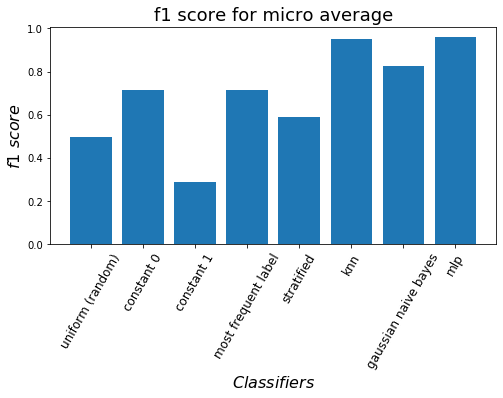

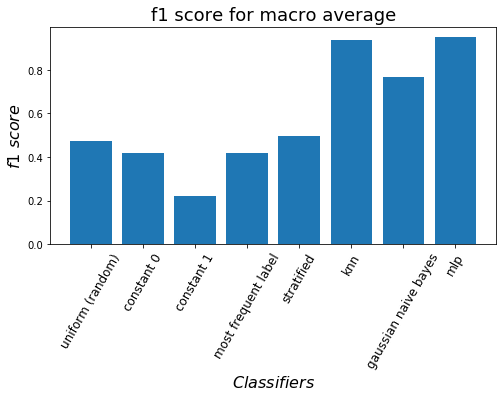

In [ ]:
#Bar plots for f1-micro average
%matplotlib inline
import matplotlib.pyplot as plt

y = np.arange(len(classifiers))

fig1, ax1 = plt.subplots()
fig1.set_size_inches(8,4)

plt.bar(y, micro_avg_f1, align='center')
plt.xticks(y, classifiers, rotation = 60, fontsize = 12)
plt.title("f1 score for micro average", fontsize = 18)
plt.xlabel("$Classifiers$", fontsize = 16)
plt.ylabel("$f1\ score$", fontsize = 16)
plt.show()

print("\n")

#Bar for f1-macro average
fig2, ax2 = plt.subplots()
fig2.set_size_inches(8,4)

plt.bar(y, macro_avg_f1, align='center')
plt.xticks(y, classifiers, rotation = 60, fontsize = 12)
plt.title("f1 score for macro average", fontsize = 18)
plt.xlabel("$Classifiers$", fontsize = 16)
plt.ylabel("$f1\ score$", fontsize = 16)
plt.show()


Αρχικά επισημαίνουμε ότι κάθε γραμμή ενός confusion matrix αντιστοιχίζεται σε μία κατηγορία ετικετών ('-1' και '1'). Τα στοιχεία εκτός διαγωνίου σε κάθε γραμμή είναι **false negative**, δηλαδή δεν κατηγοριοποιήθηκαν στην κατηγορία της γραμμής ενώ ανήκαν. Άρα με παρατήρηση των γραμμών εξετάζω το recall. Αντίστοιχα, κάθε στήλη ενός confusion matrix αντιστοιχίζεται επίσης σε μία κατηγορία ετικετών. Τα στοιχεία εκτός διαγωνίου σε κάθε στήλη είναι **false positive**, δηλαδή κατηγοριοποιήθηκαν στην κατηγορία της στήλης ενώ δεν ανήκαν. Άρα με παρατήρηση των στηλών εξετάζω το precision.<br>
**uniform (random)**: Στον πίνακα υπάρχουν μη μηδενικές (αλλά και υψηλές) τιμές στα κελιά εκτός διαγωνίου κάτι που μας εκφράζει κακό recall και precision. Ο λόγος είναι καθαρά η σχεδίαση του ταξινομητή ο οποίος ταξινομεί τυχαία, με ομοιόμορφη πιθανότητα τα δείγματα του test set σε κλάσεις. <br>
**constant_x**: Σε κάθε πίνακα constant_x όλα τα δείγματα έχουν ταξινομηθεί στην κλάση x και γι' αυτό οι μόνες μη μηδενικες τιμές στον πίνακα είναι η στήλη x. Αυτό μας δίνει κακό precision και recall σε όλες τις κλάσεις εκτός της κλάσης x όπου το precision αναμένεται πολύ μικρό αλλά το recall αναμένεται μέγιστο, δηλαδή 1. Π.χ., στον πίνακα του contant_1 η γραμμή 1 έχει μηδενικά όλα τα στοιχεία εκτός διαγωνίου (βέλτιστο recall), ενώ η στήλη 1 έχει παντού μη μηδενικά στοιχεία (κακό precision).<br>
**most frequent label**: Ο ταξινομητής αυτός είναι ίδιος με τον  constant_x, όπου x είναι η πιο συχνά εμφανιζόμενη κλάση στο train set. Επομένως ίσχυουν τα ίδια σχόλια με πριν. Μπορούμε να πούμε ότι αυτός ο ταξινομητής είναι ό,τι καλύτερο μπορεί να πετύχει ένας constant ταξινομητής.<br>
**stratified** :Στον πίνακα υπάρχουν μη μηδενικές (αλλά και υψηλές) τιμές στα κελιά εκτός διαγωνίου κάτι που μας εκφράζει κακό recall και precision. Ο λόγος είναι καθαρά η σχεδίαση του ταξινομητή ο οποίος ταξινομεί με βάση τη συχνότητα εμφάνισης των δειγμάτων στις κλάσεις στο train set.<br>
**knn** :Συνολικά είναι καλύτερος σε όλα σε σχέση με όλους τους προηγούμενους. H ταξινόμηση είναι ικανοποιητική, αν λάβουμε και υπόψιν ότι η υπερπαράμετρος k έχει επιλεγεί τυχαία και δεν έχει υπολογισθεί η βέλτιστη. Η σχεδίαση του knn δίνει γενικά καλά αποτελέσματα λόγω του ότι βασίζεται σε μία πιο αλγοριθμική προσέγγιση και καθορίζεται από τη συμπεριφορά των γειτονικών δειγμάτων. <br> 
**gaussian naive bayes** :Οι τιμές εκτός διαγωνίου αυτού του πίνακα είναι μικρές που σημαίνει ότι έχουμε κλό recall-precision συνολικά στις 2 κλάσεις. Είναι εμφανώς καλύτερος από τους dummies classifiers, αλλά ο χειρότερος από τους 3 άλλους ταξινομητές, χωρίς όμως μεγάλη διαφορά. <br>
**mlp** :Συνολικά είναι καλύτερος σε όλα σε σχέση με όλους τους προηγούμενους, με τις τιμές εκτός της διαγωνίου να είναι πολύ μικρές, γεγονός που τον θέτει ιδιαίτερα εύστοχο στην ταξινόμηση.

###Δ. Βελτιστοποίηση ταξινομητών

Σε αυτό το μέρος θα βελτιστοποιήσουμε τους ταξινομητές **knn**, **gaussian naive bayes** και **mlp** που περιγράφηκαν παραπάνω. Αυτο θα το επιτύχουμε βρίσκοντας τα στάδια προεπεξεργασίας (με τη χρήση pipelines) και τις υπερπαραμέτρους (με τη χρήση grid-search) για τον καθένα ξεχωριστά ώστε να πετυχαίνουν όσο το δυνατόν υψηλότερη απόδοση.

In [ ]:
# #επειδή το dataset μας δεν είναι εξισορροπημένο, κάνουμε oversampling για να το εξισορροπήσουμε
# from imblearn.over_sampling import RandomOverSampler
# from sklearn.preprocessing import MultiLabelBinarizer
# # αρχικοποίηση του RandomOverSampler
# ros = RandomOverSampler()
# # o RandomOverSampler θέλει τις ετικέτες όχι ως δυαδικό διάνυσμα αλλά ως αριθμό κλάσης. 
# # το [0 0 1 0 0] πρέπει να γίνει 2 κοκ

# mlb = MultiLabelBinarizer().fit(['0', '1'])
# train_resampled, trainTargets_resampled = ros.fit_sample(train,train_labels)
# # ξαναφέρνουμε τα labels σε binary μορφή
# # trainTargets_resampled = mlb.transform(trainTargets_resampled)

# # εκτυπώνουμε τις νέες διαστάσεις του train set
# print(train_resampled.shape)
# print(trainTargets_resampled.shape)
# # επιβεβαιώνουμε ότι τα labels είναι στη binary μορφή
# # print(trainTargets_resampled)
# # επιβεβαιώνουμε ότι το training set έχει εξισορροπηθεί με oversampling
# # summ = trainTargets_resampled.T.sum(axis=1)
# # print(summ) #πλήθος ανα κλάση 
# # print(summ.sum()) #σύνολο δειγμάτων
# # Μετράμε την συχνότητα εμφάνισης των δειγμάτων της κάθε κλάσης
# frequencies = pd.value_counts(trainTargets_resampled)   
# print("Συχνότητα εμφάνισης των δειγμάτων της κάθε κλάσης:")
# print(frequencies)
# for i in frequencies:
#   print("Ποσοστό: ", i/len(trainTargets_resampled)*100, '%')  
# print(trainTargets_resampled.shape)

# train = train_resampled
# train_labels = trainTargets_resampled

In [ ]:
!pip install --upgrade imbalanced-learn

Requirement already up-to-date: imbalanced-learn in c:\users\papas\anaconda3\lib\site-packages (0.6.1)


In [ ]:
from imblearn.pipeline import Pipeline

# φέρνουμε τις γνωστές μας κλάσεις για preprocessing
from sklearn import neighbors
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler # φέρνουμε τον StandarScaler ως transformer που έχει .transform kai ΄όχι ως scale()
from imblearn.over_sampling import RandomOverSampler
from sklearn.decomposition import PCA

# αρχικοποιούμε τους εκτιμητές (μετασχηματιστές και ταξινομητή) χωρίς παραμέτρους
selector = VarianceThreshold()
scaler = StandardScaler()
ros = RandomOverSampler()
pca = PCA()
#KNN Classifier
clf = neighbors.KNeighborsClassifier()
#MLP Classifier
mlp = MLPClassifier()
#Gaussian NB Classifier
gnb = GaussianNB()


#Αρχικοποιούμε ένα λεξικό με τα διάφορα pipes
pipes = {}

# KNN Clasifier
#αρχικοποιούμε διάφορα pipelines όπου καθένα συμπεριφέρεται ως ένας ενιαίος estimator
pipe1 = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('kNN', clf)])
pipe2 = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('pca', pca), ('kNN', clf)]) #without ros
pipe2 = Pipeline(steps=[('selector', selector), ('kNN', clf)])
pipe3 = Pipeline(steps=[('selector', selector), ('sampler', ros), ('kNN', clf)])
pipe4 = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('kNN', clf)]) #without pca
pipe5 = Pipeline(steps=[('scaler', scaler), ('sampler', ros), ('pca', pca), ('kNN', clf)]) #without selector
pipe6 = Pipeline(steps=[('selector', selector), ('sampler', ros), ('pca', pca), ('kNN', clf)])
pipe7 = Pipeline(steps=[('sampler', ros), ('pca', pca), ('kNN', clf)])
pipe8 = Pipeline(steps=[('sampler', ros), ('kNN', clf)])
pipe9 = Pipeline(steps=[('pca', pca), ('kNN', clf)])

pipes['pipe1'] = pipe1
pipes['pipe2'] = pipe2
pipes['pipe3'] = pipe3
pipes['pipe4'] = pipe4
pipes['pipe5'] = pipe5
pipes['pipe6'] = pipe6
pipes['pipe7'] = pipe7
pipes['pipe8'] = pipe8
pipes['pipe9'] = pipe9

In [ ]:
#Εκπαιδεύουμε και εφαρμόζουμε το pipeline και παρατηρούμε τα αποτελέσματα
for pipe_name, pipe in pipes.items():
  pipe.fit(train, train_labels)
  preds = pipe.predict(test)
  print(pipe_name, "\n", classification_report(test_labels, preds))

pipe1 
               precision    recall  f1-score   support

           0       0.98      0.93      0.95      7379
           1       0.85      0.94      0.90      2961

    accuracy                           0.94     10340
   macro avg       0.91      0.94      0.93     10340
weighted avg       0.94      0.94      0.94     10340

pipe2 
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      7379
           1       0.91      0.91      0.91      2961

    accuracy                           0.95     10340
   macro avg       0.94      0.94      0.94     10340
weighted avg       0.95      0.95      0.95     10340

pipe3 
               precision    recall  f1-score   support

           0       0.98      0.94      0.96      7379
           1       0.86      0.94      0.90      2961

    accuracy                           0.94     10340
   macro avg       0.92      0.94      0.93     10340
weighted avg       0.94      0.94      0.94     10

In [ ]:
# MLP Classifier
#MLP Classifier
mlp = MLPClassifier()
# Αρχικοποιούμε ένα λεξικό με τα διάφορα pipes
pipes = {}

#αρχικοποιούμε διάφορα pipelines όπου καθένα συμπεριφέρεται ως ένας ενιαίος estimator
pipe1 = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('mlp', mlp)])
pipe2 = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('pca', pca), ('mlp', mlp)]) #without ros
pipe2 = Pipeline(steps=[('selector', selector), ('mlp', mlp)])
pipe3 = Pipeline(steps=[('selector', selector), ('sampler', ros), ('mlp', mlp)])
pipe4 = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('mlp', mlp)]) #without pca
pipe5 = Pipeline(steps=[('scaler', scaler), ('sampler', ros), ('pca', pca), ('mlp', mlp)]) #without selector
pipe6 = Pipeline(steps=[('selector', selector), ('sampler', ros), ('pca', pca), ('mlp', mlp)])
pipe7 = Pipeline(steps=[('sampler', ros), ('pca', pca), ('mlp', mlp)])
pipe8 = Pipeline(steps=[('sampler', ros), ('mlp', mlp)])
pipe9 = Pipeline(steps=[('pca', pca), ('mlp', mlp)])

pipes['pipe1'] = pipe1
pipes['pipe2'] = pipe2
pipes['pipe3'] = pipe3
pipes['pipe4'] = pipe4
pipes['pipe5'] = pipe5
pipes['pipe6'] = pipe6
pipes['pipe7'] = pipe7
pipes['pipe8'] = pipe8
pipes['pipe9'] = pipe9

In [ ]:
#Εκπαιδεύουμε και εφαρμόζουμε το pipeline και παρατηρούμε τα αποτελέσματα
for pipe_name, pipe in pipes.items():
  pipe.fit(train, train_labels)
  preds = pipe.predict(test)
  print(pipe_name, "\n", classification_report(test_labels, preds))

pipe1 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      7379
           1       0.93      0.93      0.93      2961

    accuracy                           0.96     10340
   macro avg       0.95      0.95      0.95     10340
weighted avg       0.96      0.96      0.96     10340

pipe2 
               precision    recall  f1-score   support

           0       0.97      0.98      0.97      7379
           1       0.94      0.91      0.93      2961

    accuracy                           0.96     10340
   macro avg       0.95      0.94      0.95     10340
weighted avg       0.96      0.96      0.96     10340

pipe3 
               precision    recall  f1-score   support

           0       0.99      0.95      0.97      7379
           1       0.88      0.97      0.92      2961

    accuracy                           0.95     10340
   macro avg       0.93      0.96      0.94     10340
weighted avg       0.96      0.95      0.95     10

C:\Users\papas\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


pipe6 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      7379
           1       0.93      0.94      0.93      2961

    accuracy                           0.96     10340
   macro avg       0.95      0.95      0.95     10340
weighted avg       0.96      0.96      0.96     10340



C:\Users\papas\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


pipe7 
               precision    recall  f1-score   support

           0       0.98      0.97      0.97      7379
           1       0.93      0.94      0.93      2961

    accuracy                           0.96     10340
   macro avg       0.95      0.95      0.95     10340
weighted avg       0.96      0.96      0.96     10340

pipe8 
               precision    recall  f1-score   support

           0       0.98      0.96      0.97      7379
           1       0.90      0.95      0.93      2961

    accuracy                           0.96     10340
   macro avg       0.94      0.96      0.95     10340
weighted avg       0.96      0.96      0.96     10340

pipe9 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      7379
           1       0.93      0.92      0.93      2961

    accuracy                           0.96     10340
   macro avg       0.95      0.95      0.95     10340
weighted avg       0.96      0.96      0.96     10

C:\Users\papas\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
# GNB Classifier
# Αρχικοποιούμε ένα λεξικό με τα διάφορα pipes
pipes = {}

#αρχικοποιούμε διάφορα pipelines όπου καθένα συμπεριφέρεται ως ένας ενιαίος estimator
pipe1 = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('gnb', gnb)])
pipe2 = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('pca', pca), ('gnb', gnb)]) #without ros
pipe2 = Pipeline(steps=[('selector', selector), ('gnb', gnb)])
pipe3 = Pipeline(steps=[('selector', selector), ('sampler', ros), ('gnb', gnb)])
pipe4 = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('gnb', gnb)]) #without pca
pipe5 = Pipeline(steps=[('scaler', scaler), ('sampler', ros), ('pca', pca), ('gnb', gnb)]) #without selector
pipe6 = Pipeline(steps=[('selector', selector), ('sampler', ros), ('pca', pca), ('gnb', gnb)])
pipe7 = Pipeline(steps=[('sampler', ros), ('pca', pca), ('gnb', gnb)])
pipe8 = Pipeline(steps=[('sampler', ros), ('gnb', gnb)])
pipe9 = Pipeline(steps=[('pca', pca), ('gnb', gnb)])

pipes['pipe1'] = pipe1
pipes['pipe2'] = pipe2
pipes['pipe3'] = pipe3
pipes['pipe4'] = pipe4
pipes['pipe5'] = pipe5
pipes['pipe6'] = pipe6
pipes['pipe7'] = pipe7
pipes['pipe8'] = pipe8
pipes['pipe9'] = pipe9

In [ ]:
#Εκπαιδεύουμε και εφαρμόζουμε το pipeline και παρατηρούμε τα αποτελέσματα
for pipe_name, pipe in pipes.items():
  pipe.fit(train, train_labels)
  preds = pipe.predict(test)
  print(pipe_name, "\n", classification_report(test_labels, preds))

pipe1 
               precision    recall  f1-score   support

           0       0.94      0.32      0.47      7379
           1       0.36      0.95      0.52      2961

    accuracy                           0.50     10340
   macro avg       0.65      0.63      0.50     10340
weighted avg       0.77      0.50      0.49     10340

pipe2 
               precision    recall  f1-score   support

           0       0.84      0.93      0.89      7379
           1       0.78      0.56      0.65      2961

    accuracy                           0.83     10340
   macro avg       0.81      0.75      0.77     10340
weighted avg       0.82      0.83      0.82     10340

pipe3 
               precision    recall  f1-score   support

           0       0.84      0.93      0.89      7379
           1       0.78      0.57      0.66      2961

    accuracy                           0.83     10340
   macro avg       0.81      0.75      0.77     10340
weighted avg       0.83      0.83      0.82     10

In [ ]:
#Υπολογίζουμε τη διακύμανση του train set για να δούμε τι τιμές να βάλουμε στο vthreshold 
train_var = train.var(axis=0)
print(train.shape)
print(test.shape)
print(train_var)
print("max variance: ", np.max(train_var))
print("min variance: ", np.min(train_var))

(24125, 174)
(10340, 174)
[1.79409895e-01 1.43857363e-01 9.30163149e-02 1.36060603e-01
 1.05880836e-01 1.38463349e-01 4.08660219e-02 4.36460095e-02
 2.22143086e-02 3.24050145e-02 2.64030840e-02 3.29383974e-02
 4.41624823e-02 4.42848948e-02 1.63213729e-02 2.79978309e-02
 1.68689597e-02 2.85027158e-02 4.82800303e-02 4.55245903e-02
 2.84305763e-02 4.23527687e-02 3.18519246e-02 4.76615347e-02
 3.69924214e-03 5.96130138e-03 3.18192283e-03 4.49271703e-03
 5.25716272e-03 7.16635684e-03 3.33204410e-02 3.33204410e-02
 1.17811351e-02 1.91593903e-02 1.19559990e-02 1.91763421e-02
 4.40024631e-02 4.46281915e-02 2.70175983e-02 3.75721906e-02
 2.73375557e-02 3.77587957e-02 6.40946111e-02 6.41363272e-02
 3.69949591e-02 5.48932710e-02 5.05288175e-02 6.55709627e-02
 4.10679970e-02 7.83731394e-02 4.12341038e-02 5.44527910e-02
 5.45443538e-02 7.36683004e-02 6.56336088e-02 6.63154822e-02
 1.82620202e-02 3.78201740e-02 1.67938967e-02 3.77772074e-02
 2.90067905e-04 2.90067905e-04 2.90067905e-04 2.90067905e-0

In [ ]:
from sklearn.model_selection import GridSearchCV
vthreshold = [0.03] #προσαρμόζουμε τις τιμές μας στο variance που παρατηρήσαμε
n_components_knn = [10,30,50,70,90]
n_components_mlp = [70,90,110,130,150]

#KNN Classifier
k = [1,3,5,7,9,15,23,31] # η υπερπαράμετρος του ταξινομητή
weights = ['distance']
metric = ['manhattan', 'euclidean']

#MLP Classifier
hidden_layer_sizes = [(75,),(100,),(125,)]
activation = ['logistic', 'tanh', 'relu']
solver = ['lbfgs', 'sgd', 'adam']
alpha = [0.00005,0.0001]
learning_rate = ['adaptive']
max_iter = [150,200]

#GNB Classifier δεν θα βελτιστοποιήσουμε παραμέτρους

In [ ]:
#KNN
#pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('kNN', clf)], memory = 'tmp')
pipe9 = Pipeline(steps=[('pca', pca), ('kNN', clf)], memory = 'tmp') # το pipe που βγάζει τα καλύτερα αποτελέσματα στις δοκιμές
estimator_micro_knn = GridSearchCV(pipe9, dict(pca__n_components=n_components_knn, kNN__n_neighbors=k, kNN__weights=weights, kNN__metric=metric), cv=5, scoring='f1_micro', n_jobs=-1)
estimator_macro_knn = GridSearchCV(pipe9, dict(pca__n_components=n_components_knn, kNN__n_neighbors=k, kNN__weights=weights, kNN__metric=metric), cv=5, scoring='f1_macro', n_jobs=-1)

#MLP
pipe9 = Pipeline(steps=[('pca', pca), ('mlp', mlp)], memory = 'tmp') # το pipe που βγάζει τα καλύτερα αποτελέσματα στις δοκιμές
estimator_micro_mlp = GridSearchCV(pipe9, dict(pca__n_components=n_components_mlp, mlp__hidden_layer_sizes=hidden_layer_sizes, mlp__activation=activation, mlp__solver=solver, mlp__learning_rate=learning_rate, mlp__alpha=alpha, mlp__max_iter=max_iter), cv=5, scoring='f1_micro', n_jobs=-1)
estimator_macro_mlp = GridSearchCV(pipe9, dict(pca__n_components=n_components_mlp, mlp__hidden_layer_sizes=hidden_layer_sizes, mlp__activation=activation, mlp__solver=solver, mlp__learning_rate=learning_rate, mlp__alpha=alpha, mlp__max_iter=max_iter), cv=5, scoring='f1_macro', n_jobs=-1)

#GNB
#pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('gnb', gnb)], memory = 'tmp')
pipe4 = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('gnb', gnb)]) # το pipe που βγάζει τα καλύτερα αποτελέσματα στις δοκιμές
estimator_micro_gnb = GridSearchCV(pipe4, dict(selector__threshold=vthreshold), cv=5, scoring='f1_micro', n_jobs=-1)
estimator_macro_gnb = GridSearchCV(pipe4, dict(selector__threshold=vthreshold), cv=5, scoring='f1_macro', n_jobs=-1)

#Αποθηκεύουμε όλα τα αποτελέσματα σε πίνακες για να απαντήσουμε στα επόμενα ερωτήματα 
estimators_micro = []
estimators_macro = []

estimators_micro.append(estimator_micro_knn)
estimators_micro.append(estimator_micro_gnb)
estimators_micro.append(estimator_micro_mlp)

estimators_macro.append(estimator_macro_knn)
estimators_macro.append(estimator_macro_gnb)
estimators_macro.append(estimator_macro_mlp)


2. *Για το τελικό fit του κάθε ταξινομητή στο σύνολο του training set και για το predict στο test set εκτυπώστε πίνακες με τους χρόνους εκτέλεσης.*

In [ ]:
import time
train_time_macro =[]
test_time_macro = []
train_time_micro =[]
test_time_micro = []
f1_micro_scores = []
f1_macro_scores = []
micro_scores = []
macro_scores = []
cnf_matrix_macro = []
cnf_matrix_micro = []

for i in estimators_micro:    
    # micro
    start_time = time.time()
    i.fit(train, train_labels)
    train_time_micro.append(time.time() - start_time)
    start_time = time.time()
    preds_micro = i.predict(test)
    test_time_micro.append(time.time() - start_time)
    micro_scores.append(precision_recall_fscore_support(test_labels, preds_micro, average='micro'))
    f1_micro_scores.append(precision_recall_fscore_support(test_labels, preds_micro, average='micro')[2])
    cnf_matrix_micro.append(confusion_matrix(test_labels, preds_micro))

for i in estimators_macro:
    # macro
    start_time = time.time()
    i.fit(train, train_labels)
    train_time_macro.append(time.time() - start_time)
    start_time = time.time()
    preds_macro = i.predict(test)
    test_time_macro.append(time.time() - start_time)
    macro_scores.append(precision_recall_fscore_support(test_labels, preds_macro, average='macro'))
    f1_macro_scores.append(precision_recall_fscore_support(test_labels, preds_macro, average='macro')[2])
    cnf_matrix_macro.append(confusion_matrix(test_labels, preds_macro))

time_micro = []
time_macro = []
time_micro.append(train_time_micro)
time_micro.append(test_time_micro)
time_macro.append(train_time_macro)
time_macro.append(test_time_macro)

In [ ]:
print("Χρόνοι για fit στο train και predict στο test set, με average = micro")
pd.DataFrame(time_micro, index=["train fit", "test predict"], columns = ["KNN", "GNB", "MLP"])

Χρόνοι για fit στο train και predict στο test set, με average = micro


,KNN,GNB,MLP
train fit,410.095994,1.035501,16139.181712
test predict,17.700195,0.050970,0.064967


In [ ]:
print("Χρόνοι για fit στο train και predict στο test set, με average = macro")
pd.DataFrame(time_macro, index=["train fit", "test predict"], columns = ["KNN", "GNB", "MLP"])

Χρόνοι για fit στο train και predict στο test set, με average = macro


,KNN,GNB,MLP
train fit,414.097994,4.832082,15735.740293
test predict,17.444957,0.050972,0.060966


In [ ]:
print("macro")
print(estimator_macro_mlp.best_estimator_)
print(estimator_macro_mlp.best_params_)

print("micro")
print(estimator_micro_mlp.best_estimator_)
print(estimator_micro_mlp.best_params_)

print("macro")
print(estimator_macro_knn.best_estimator_)
print(estimator_macro_knn.best_params_)

print("micro")
print(estimator_micro_knn.best_estimator_)
print(estimator_micro_knn.best_params_)

macro
Pipeline(memory='tmp',
         steps=[('pca',
                 PCA(copy=True, iterated_power='auto', n_components=130,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('mlp',
                 MLPClassifier(activation='tanh', alpha=0.0001,
                               batch_size='auto', beta_1=0.9, beta_2=0.999,
                               early_stopping=False, epsilon=1e-08,
                               hidden_layer_sizes=(100,),
                               learning_rate='adaptive',
                               learning_rate_init=0.001, max_fun=15000,
                               max_iter=150, momentum=0.9, n_iter_no_change=10,
                               nesterovs_momentum=True, power_t=0.5,
                               random_state=None, shuffle=True, solver='adam',
                               tol=0.0001, validation_fraction=0.1,
                               verbose=False, warm_sta

3. *Για κάθε averaged metric, εκτυπώστε bar plot σύγκρισης με τις τιμές του συγκεκριμένου f1 για όλους τους classifiers.*

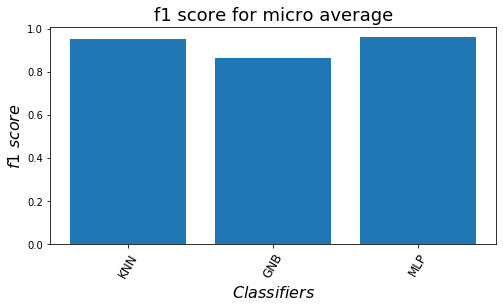

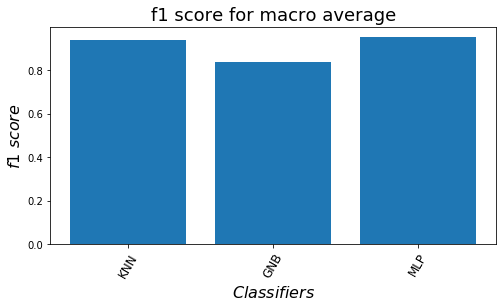

In [ ]:
import matplotlib.pyplot as plt

# classifiers = list(spam_pred.keys())

classifiers = ["KNN", "GNB", "MLP"]
y = np.arange(len(classifiers))

fig1, ax1 = plt.subplots()
fig1.set_size_inches(8,4)

#micro_avg_f1[-1] = f1_micro[2]
plt.bar(y, f1_micro_scores, align='center')
plt.xticks(y, classifiers, rotation = 60, fontsize = 12)
plt.title("f1 score for micro average", fontsize = 18)
plt.xlabel("$Classifiers$", fontsize = 16)
plt.ylabel("$f1\ score$", fontsize = 16)
plt.show()

print("\n")

#Bar for f1-macro average
fig2, ax2 = plt.subplots()
fig2.set_size_inches(8,4)

#macro_avg_f1[-1] = f1_macro[2]
plt.bar(y, f1_macro_scores, align='center')
plt.xticks(y, classifiers, rotation = 60, fontsize = 12)
plt.title("f1 score for macro average", fontsize = 18)
plt.xlabel("$Classifiers$", fontsize = 16)
plt.ylabel("$f1\ score$", fontsize = 16)
plt.show()

4. *Τυπώστε πίνακα με τη μεταβολή της επίδοσης των ταξινομητών πριν και μετά τη βελτιστοποίησή τους.*

In [ ]:
print("Μεταβολή επίδοσης για f1 micro")
f1_progress_micro = [micro_avg_f1[5:], f1_micro_scores]
pd.DataFrame(f1_progress_micro, index=["before", "after"], columns = ["KNN", "GNB", "MLP"])

Μεταβολή επίδοσης για f1 micro


,KNN,GNB,MLP
before,0.948936,0.827950,0.960445
after,0.952031,0.866538,0.960928


In [ ]:
print("Μεταβολή επίδοσης για f1 macro")
f1_progress_macro = [macro_avg_f1[5:], f1_macro_scores]
pd.DataFrame(f1_progress_macro, index=["before", "after"], columns = ["KNN", "GNB", "MLP"])

Μεταβολή επίδοσης για f1 macro


,KNN,GNB,MLP
before,0.937507,0.768770,0.951498
after,0.941412,0.838655,0.952173


5. *Σχολιάστε τα αποτελέσματα των plots και των τιμών precision, recall, f1 των πινάκων σύγχυσης, τη μεταβολή της απόδοσης και τους χρόνους εκτέλεσης.*<br>

In [ ]:
classif = ["KNN", "GNB", "MLP"]
j=0
for i in cnf_matrix_micro:
    print("Confusion matrix for f1 micro", classif[j])
    j+=1
    print(i)
j=0
for i in cnf_matrix_macro:
    print("Confusion matrix for f1 macro", classif[j])
    j+=1
    print(i)

Confusion matrix for f1 micro KNN
[[7123  256]
 [ 240 2721]]
Confusion matrix for f1 micro GNB
[[6620  759]
 [ 621 2340]]
Confusion matrix for f1 micro MLP
[[7180  199]
 [ 205 2756]]
Confusion matrix for f1 macro KNN
[[7123  256]
 [ 240 2721]]
Confusion matrix for f1 macro GNB
[[6608  771]
 [ 614 2347]]
Confusion matrix for f1 macro MLP
[[7180  199]
 [ 205 2756]]


Παρατηρούμε ότι αν και οι classifiers **Knn** και **MLP** παρατηρούν μια μικρή βελτίωση στις επιδόσεις τους (f1 macro και f1 micro) μετά τη βελτιστοποίηση των υπερπαραμέτρων, oi επιδόσεις του classifier **GNB**  έχουν βελτιωθεί κατα πολύ(5%-7%), μόνο με τη διαγραφή χαρακτηριστικών βάση της διακύμανσης τους και ενός βέλτιστου threshold. Επίσης παρατηρούμε από τους πίνακες σύγχισης ότι οι τιμές των διαγωνίων έχουν αυξηθεί κατά λίγο, και οι τιμές εκτός διαγωνίου έχουν μειωθεί, γεγονός που σημαίνει ότι έχουμε καλύτερες επιδόσεις recall και precision, με το φαινόμενο αυτό να είναι πιο αισθητό στον classifier **GNB**.

Βλέπουμε ότι ο χρόνος εκπαίδευσης των 3 ταξινομητών είναι πολύ μεγαλύτερος από το χρόνο πρόβλεψης, γεγονός αναμενόμενο. Παρατηρούμε επίσης ότι οι classifiers **Knn** και **GNB** έχουν πολύ μικρότερο από τον χρόνο εκπαίδευσης από τον **MLP**. Αυτό οφείλεται στο ότι ο **MLP** χρειάζεται πολλή χρόνο για την εύρεση των βαρών προς τους κόμβους, λόγω των πολλών εποχών και των πολλών νευρώνων, σε αντίθεση με τους άλλους 2 ταξινομητές, οι οποίοι υπολογίζουν ο μεν **Knn** τους Κ πλησιέστερους κόμβους, και ο **GNB** την πιθανότητα να ανήκει στην κάθε κλάση. Επίσης, για τον classifier **Knn** τρέχουμε μόνο ένα pca, για τον classifier **GNB**  ένα selector ενώ για τον classifier **MLP** τρέχουμε selector και pca και βελτιστοποιούμε τις παραμέτρους hidden layer sizes, activation, solver, learning rate, alpha και max iter. Όσο για τον χρονο εκτίμησης των classifiers, βλέπουμε ότι οι **GNB** και **MLP** έχουν πολύ μικρότερο χρόνο από τον **Knn**, αφού ο **Knn** υπολογίζει κάθε φορά τους Κ κοντινότερους γείτονες του κάθε κόμβου που εξετάζει και απαντάει σε ποια ομάδα ανήκει ο τρέχων κόμβος.

Με το πέρας της βελτιστοποίησης παραμέτρων και της εύρεσης της βέλτιστης αρχιτεκτονικής και στους 3 classifiers, παρατηρούμε ότι οι 2 (**Knn** και **MLP**) πετυχαίνουν επιδόσεις της τάξης του 95%, και ο **GNB** πέτυχε επιδόσεις της τάξης του 85%.